In [1]:
import pandas as pd

import matplotlib.pyplot as plt

import numpy as np

In [2]:
def make_connection_with_db():
    import mysql.connector
  
    connection_mydb = mysql.connector.connect(
        host="localhost",
        user="root",
        password="",
        database="market"
    )
    cursor = connection_mydb.cursor(dictionary=True)#dictionary=True result in dectionary
    return connection_mydb, cursor

In [8]:
def get_categories_sales():
    _,curser=make_connection_with_db()

    query='''SELECT wp_term_taxonomy.term_id , wp_terms.name ,   
            sum(wp_wc_order_product_lookup.product_qty) as sumsales
            FROM wp_wc_order_product_lookup 
            INNER JOIN wp_term_relationships  ON wp_term_relationships.object_id=wp_wc_order_product_lookup.product_id
            INNER JOIN wp_term_taxonomy ON wp_term_relationships.term_taxonomy_id = wp_term_taxonomy.term_taxonomy_id
            INNER JOIN wp_terms ON wp_terms.term_id = wp_term_taxonomy.term_id
            WHERE wp_term_taxonomy.taxonomy ='product_cat' 
            group by wp_term_taxonomy.term_id'''
    
    curser.execute(query)
    results=curser.fetchall()

    df=pd.DataFrame(columns=['term_id','name','sumsales'])

    for product in results:
        term_id=product['term_id']
        name=product['name']
        sum=product['sumsales']

        obj={'term_id':[term_id]
             ,'name':[name],
             'sumsales':[sum]}
        
        df2=pd.DataFrame(obj)
        df=pd.concat([df,df2],ignore_index=True)
    return df

In [11]:
customer_sales=get_categories_sales()
customer_sales

,term_id,name,sumsales
0,74,ملابس رجالي,2044
1,75,ملابس نسائي,2248
2,76,أحذية رجالي,1283
3,77,أحذية نسائي,758
4,78,إلكترونيات,1392
5,79,مستحضرات تجميل,905
6,82,إكسسوارات,506


In [16]:
def show_customers_by_countries_bars():
    
    df = get_categories_sales()
    
    import arabic_reshaper
    from bidi.algorithm import get_display
    
    df['name'] = df['name'].apply(lambda a: get_display(arabic_reshaper.reshape(a)))
    
    x = df['name']
    
    y = df['sumsales']
    
    plt.figure(figsize=(10,6))
    
    plt.xlabel("Category")
    plt.ylabel("Sales")
    
    plt.title('Sales per Categories')
    
    colors = []
    for i in range(len(x)):
        
        colors.append([np.random.rand(),np.random.rand(),np.random.rand()])
        
        plt.text(x=i, y=y[i], s=y[i])
    
    plt.bar(x, y, color=colors)
    
    plt.show()

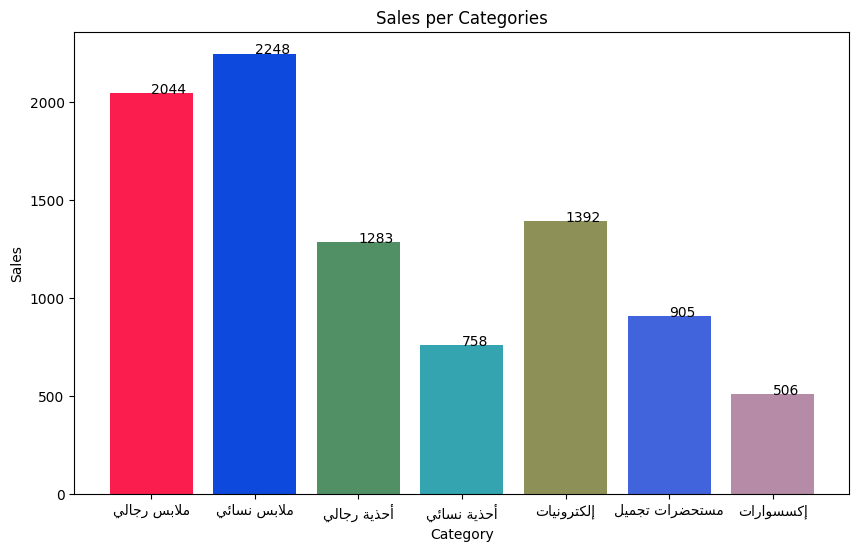

In [17]:
show_customers_by_countries_bars()

In [18]:
def show_categories_sales_pie():
    
    df = get_categories_sales()
    
    import arabic_reshaper
    from bidi.algorithm import get_display
    
    df['name'] = df['name'].apply(lambda a: get_display(arabic_reshaper.reshape(a)))
    
    plt.figure(figsize=(10,6))
    
    plt.pie(df['sumsales'], labels=df['name'], autopct='%1.1f%%')
    
    plt.title('Categories Sales Pie')
    
    plt.show()

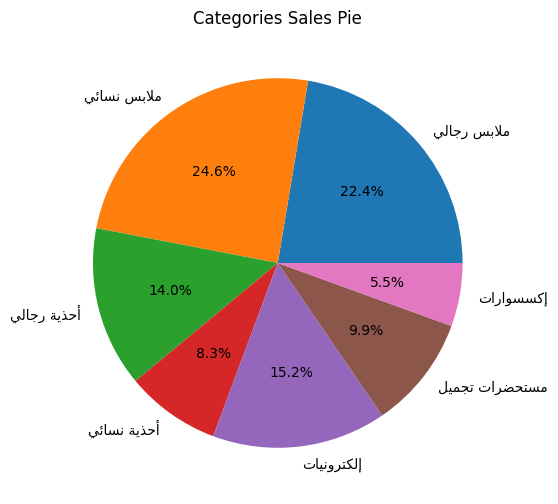

In [19]:
show_categories_sales_pie()